In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import f1_score, matthews_corrcoef, recall_score, precision_score, accuracy_score

In [10]:
rand_metrics = {"MCC": {}, "ACC": {}, "F1": {}, "Rec": {}, "Prec": {}}
for i in range(1, 101):
    p = i/100
    y_true = np.random.binomial(1, p, size = 100000)
    y_pred = np.random.binomial(1, p, size = 100000)
    rand_metrics["MCC"][i] = matthews_corrcoef(y_true, y_pred)
    rand_metrics["ACC"][i] = accuracy_score(y_true, y_pred)
    rand_metrics["Rec"][i] = precision_score(y_true, y_pred)
    rand_metrics["Prec"][i] = recall_score(y_true, y_pred)
    rand_metrics["F1"][i] = f1_score(y_true, y_pred)

Text(0.5, 0.98, 'Randomly predicting the mean')

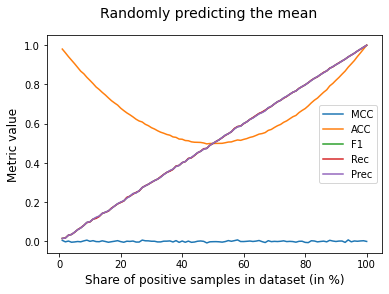

In [11]:
df = pd.DataFrame.from_dict(rand_metrics)
plt.plot(df, label=df.columns)
plt.xlabel("Share of positive samples in dataset (in %)", fontsize=12)
plt.ylabel("Metric value", fontsize=12)
plt.legend()
plt.suptitle('Randomly predicting the mean', fontsize=14)

In [ ]:
rand_metrics = {"MCC": {}, "ACC": {}, "F1": {}, "Rec": {}, "Prec": {}}
for i in range(1, 101):
    p = i/100
    y_true = np.random.binomial(1, p, size = 100000)
    y_pred = np.random.binomial(1, p, size = 100000)
    rand_metrics["MCC"][i] = matthews_corrcoef(y_true, y_pred)
    rand_metrics["ACC"][i] = accuracy_score(y_true, y_pred)
    rand_metrics["F1"][i] = f1_score(y_true, y_pred)
    rand_metrics["Rec"][i] = precision_score(y_true, y_pred)
    rand_metrics["Prec"][i] = recall_score(y_true, y_pred)

In [18]:
# manipulating f to 0.5 more interesting for ROCAUC combi
from sklearn.metrics import fbeta_score, roc_auc_score
f_metrics = {"F0.5_mode": {}, "F2_mode": {}, "F1_mode": {}, "F0.5_true": {}, "F2_true": {}, "F1_true": {},#},
            "MCC_mode": {},"ACC_mode": {},  "MCC_true": {}, "ACC_true":{}}
            # "Rec_maj": {},"Prec_maj": {},  "Rec_true": {}, "Prec_true":{}}
for i in range(1, 101):
    p = i/100
    y_true = np.random.binomial(1, p, size = 100000)
    # y_pred = np.random.binomial(1, p, size = 100000)
    y_pred_maj = np.array(100000*[mode(y_true)[0][0]])
    y_pred_true = np.array(100000*[1])
    f_metrics["F0.5_mode"][i] = fbeta_score(y_true, y_pred_maj, beta = 0.5)
    f_metrics["F2_mode"][i] = fbeta_score(y_true, y_pred_maj, beta = 2)
    f_metrics["F1_mode"][i] = f1_score(y_true, y_pred_maj)
    f_metrics["MCC_mode"][i] = matthews_corrcoef(y_true, y_pred_maj)
    f_metrics["ACC_mode"][i] = accuracy_score(y_true, y_pred_maj)
    # f_metrics["Rec_maj"][i] = precision_score(y_true, y_pred_maj)
    # f_metrics["Prec_maj"][i] = recall_score(y_true, y_pred_maj)
    f_metrics["F0.5_true"][i] = fbeta_score(y_true, y_pred_true, beta = 0.5)
    f_metrics["F2_true"][i] = fbeta_score(y_true, y_pred_true, beta = 2)
    f_metrics["F1_true"][i] = f1_score(y_true, y_pred_true)
    f_metrics["MCC_true"][i] = matthews_corrcoef(y_true, y_pred_true)
    f_metrics["ACC_true"][i] = accuracy_score(y_true, y_pred_true)
    # f_metrics["Rec_true"][i] = precision_score(y_true, y_pred_true)
    # f_metrics["Prec_true"][i] = recall_score(y_true, y_pred_true)
# pd.DataFrame.from_dict(f_metrics).plot()

In [40]:
from scipy.stats import mode

In [25]:
df_const = pd.DataFrame.from_dict(f_metrics)

Text(0.5, 0.98, 'Constantly predicting the mode/ true class')

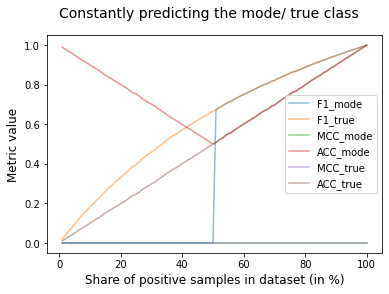

In [34]:
df = df_const[['F1_mode', 'F1_true', 'MCC_mode', 'ACC_mode', 'MCC_true', 'ACC_true']]
plt.plot(df, label=df.columns, alpha = 0.5)
plt.xlabel("Share of positive samples in dataset (in %)", fontsize=12)
plt.ylabel("Metric value", fontsize=12)
plt.legend()
plt.suptitle('Constantly predicting the mode/ true class', fontsize=14)

Text(0.5, 0.98, 'Constantly predicting the mode/ true class')

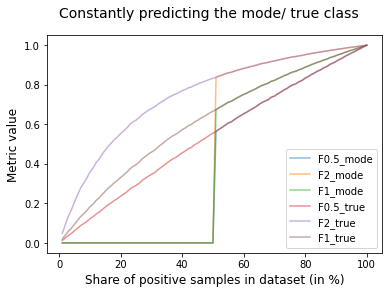

In [36]:
df = df_const[['F0.5_mode', 'F2_mode', 'F1_mode', 'F0.5_true', 'F2_true', 'F1_true']]
plt.plot(df, label=df.columns, alpha = 0.5)
plt.xlabel("Share of positive samples in dataset (in %)", fontsize=12)
plt.ylabel("Metric value", fontsize=12)
plt.legend()
plt.suptitle('Constantly predicting the mode/ true class', fontsize=14)